# 傅里叶变换


In [1]:
import numpy as np
import cupy as cp
import scipy as sp
import skimage as ski
import skimage.io as skio
import skimage.color as skc
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
src1 = skio.imread('../../datas/f2.jpg')
src2 = skio.imread('../../datas/f1.jpg')
gray = ski.img_as_ubyte(skc.rgb2gray(src1))

C:\Users\jenson\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [3]:
src_gpu = cp.array(src1.astype(np.float64))

In [4]:
dst_gpu = cp.fft.fft2(src_gpu)

In [5]:
dst_gpu_fftshift = cp.fft.fftshift(dst_gpu)

In [6]:
magnitude_spectrum_gpu = 20*cp.log(cp.abs(dst_gpu_fftshift))
magnitude_spectrum = magnitude_spectrum_gpu.get()
magnitude_spectrum = np.clip(magnitude_spectrum,0,255)
magnitude_spectrum = np.uint8(magnitude_spectrum)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

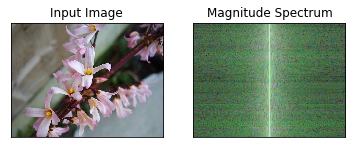

In [7]:
plt.subplot(121)
plt.imshow(src1,cmap = 'gray')
plt.title('Input Image')
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]),plt.yticks([])